# What is a Decision Tree

According to <a href="https://en.wikipedia.org/wiki/Decision_tree">Wikipedia.</a>
<p><i><h4>
"A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements"
    </h4>   </i></p>

<h2>What does this mean? </h2>

I know what the definition want to say, but I don't know what it said :( . 

According to me you take decision on each node and eventually you know what decision you should take. Like, If the <b>outlook</b> is <b><i>sunny</i></b> and <b>humidity</b> is <b><i>low</i></b> . I think I will say <b>yes</b> to playing tennis and it should look something like this
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png" alt="Decision Tree">


Visually appealling and easy to grasp :). 


# How to Construct a Decision Tree

<p>
That is where the problem starts ? 

Almost everyone after looking at decision tree can tell how they work but when you raise the question how to build it programatically most of the people will look away. 

But why is that, The structure looks so simple and easy to grasp, it should be easy to implement as well. 

Answer is "yes" it is easy to implement, most of the people have not thought how to implement it programmatically because the visual interpretation is so close to how we make our decisions , it becomes almost intuitive. And once you have intuition about something you will not have too many questions. 

For example if we show Neural netwrok to people and tell them this works with 90% accuracy, most of the people would say <b> "how?" </b>, because the neural network structure is not intuitive at first glance.

</p>


## Let's try to build a Decision Tree

I want every step to be intuitive and easy to understand. So I will be using an example dataset throughout (Famous Iris Dataset). 

Before we start let's look at initial setup. 
1. I am using Python for this example, but language is never a barrier, you can implement in which ever language you want (In some ways using a different programming language will make it easier to understand the concepts)
2. I will be using numpy, Pythons numerical library (to perform mathematical operations)
3. I will be using pandas, to read the dataset initially. 
4. I will be using matplotlib and seaborn to graphically show the output at each step

Note :- The same can be done using either Pandas or numpy, but pandas are slow but more interpretable and numpy arrays are vice-versa in comparison.

lets go ahead and import all the libraries

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

###  Something about the dataset

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. There are 5 variables (sepal_length, sepal_width, petal_length,petal_width and species) 

Eventaully we will be predicting species using other 4 variables

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


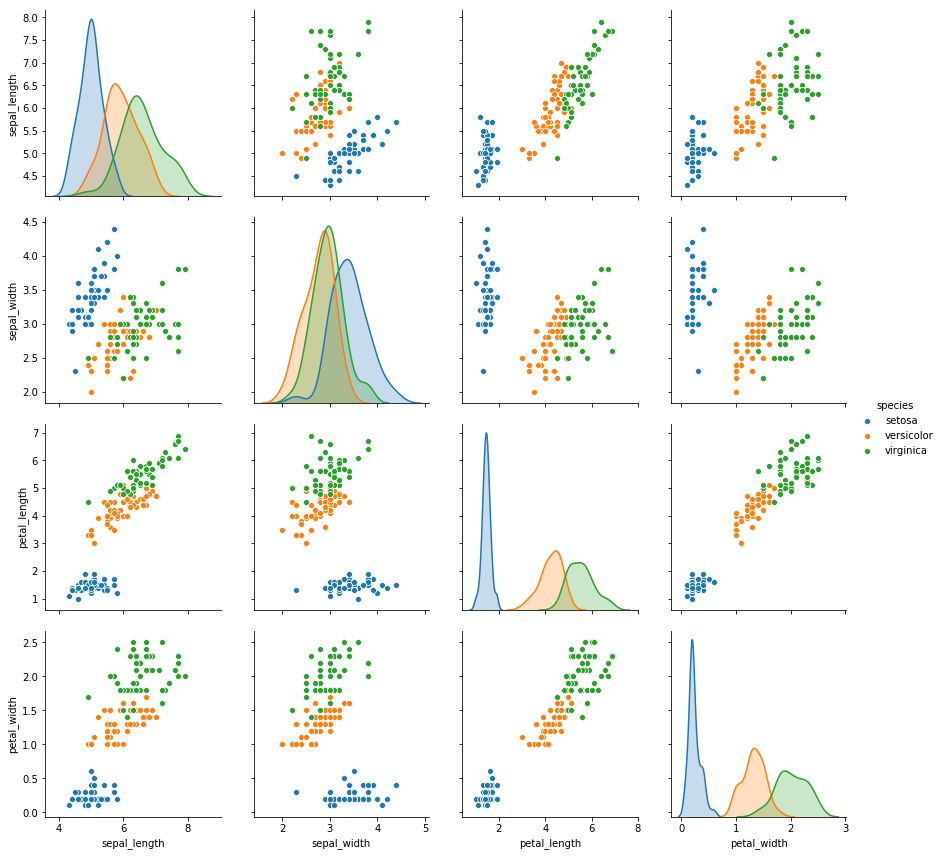

In [3]:
sns.pairplot(df, hue="species", height=3)

Looking at the distribution of variables one class (sentosa) is clearly separable using petal_width or petal_length,if we have a correct decision bourdary. Other 2 classes are overlapping to some extent and it is very difficult to separate them 100%. 

Let me show how can we separate sentosa from other classes with only one decision boundry.

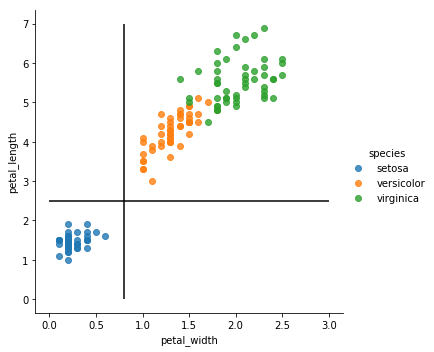

In [4]:
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.vlines(x=0.8,ymin=0,ymax=7)

plt.hlines(y=2.5,xmin=0,xmax=3)

Any of the above two lines can be used to separate the sentosa species from other classes. The decision tree we will construct we should see similar decision

# What we need to do

We want to construct a decision tree which will have nodes which will conpare some attribute and based on which it will divide the data into 2 sub datasets.

lets just look at what are the things that we need to know before we start this programming experiment.

1. How would the program decide which feature to choose ?
2. After Choosing the feature, how would the program decide on which value to split the tree.
3. How can be deal with categorical and continuous variables
4. How would we divide the tree
5. How to store the result of the variable 
6. How to store the tree
7. How to decide when to stop
9. How would we create a tree
10. How to predict using the tree
11. How to use the decision tree



## How to use the decision tree

Before I go any further let's look at the existing implementation of Decision Tree in sklearn
<p> <i><b>
from sklearn.datasets import load_iris 
    
from sklearn import tree

iris = load_iris()

clf = tree.DecisionTreeClassifier()      ----------------------    1

clf = clf.fit(iris.data, iris.target)    ----------------------    2

pred = clf.predict(iris.data)            ----------------------    3
    
</b></i></p>
There are 3 important steps in constructing a decision tree in sklearn implementation.
1. call the constructor method and create a decision tree instance
2. Call the fit method and create the decision tree for the problem
3. Call the predict method to predict for new instances

We will also be implementing in similar way with 2 APIs 
1. fit - to train the decision tree
2. predict - to predict for new instances of data

So immediately we can understand that a class needs to be created with fit and predict methods

Our Solution should look something like this

<h4>
dt = DecisionTree()

clf = dt.fit(X_train,label)

pred = clf.predict(X_test)
</h4>

The decision tree learning algorithm recursively learns the tree as follows:

1. Assign all training instances to the root of the tree. Set curent node to root node.
2. For each attribute Partition all data instances at the node by the value of the attribute.
3. Compute the information gain ratio from the partitioning.
4. Identify feature that results in the greatest information gain ratio. Set this feature to be the splitting criterion at the current node.
5. If the best information gain ratio is 0, tag the current node as a leaf and return.
6. Partition all instances according to attribute value of the best feature.
7. Denote each partition as a child node of the current node.
8. For each child node:
    a. If the child node is “pure” (has instances from only one class) tag it as a leaf and return.
    b. If not set the child node as the current node and recurse to step 2.
    
    
    
Based on above we would be required to write following functions to create the decision tree
1. Function to identify partition values for all attribute
2. Function to identify the best feature and value to particition on using entropy and information gain
3. Split the data into 2 using the partition value
4. Check each split if Data is Pure (0 information Gain), then stop for that split
5. Else iterate through recursively
6. Function to calculate entropy
7. function to calculate information Gain
8. Function to check Purity
9. Function to return classification from leaf node

### 1. Function to identify partition values for all attribute

Our function should look this below. It should take the data and labels and return all the potential splits for all columns

In [5]:
def all_potential_splits(data):
    
    return potential_splits

How can we get all the potential splits. 
1. Iterate through each attribute
2. identify the unique values for that attribute (continuous and numeric doesn't matter here, but will matter later)
3. store the unique values with the attribute index in a dictionary and return the dictionary

To verify that we have created the function correctly we would use iris data to validate


In [6]:
data = df.drop("species",axis=1).values
label = df["species"]

In [7]:
# 1 - Create an empty dictionary, we will create our splits and store the splits in this dictionary. 
#      The format of the dictionary will be {col_index:[list of all possible values]} 
potential_splits ={}        
# 2   Since we need to iterate through each column in the dataset we would need the column count. Row count is not required here
n_row , n_col = data.shape
# 3   In this Step we are iterating through each column in the dataset identifying the unique values and 
#     storing the values in our dictionary with that column index 
for col_index in range(n_col):
    values = data[:,col_index]
    unique_values = np.unique(values)    
    potential_splits[col_index] = unique_values

pprint(potential_splits)

{0: array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]),
 1: array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4]),
 2: array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3. , 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9]),
 3: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])}


Looks like our code is working properly. We can incorporate this into our function. This function will later become method within a class DecisionTree


In [8]:
def all_potential_splits(data):
    # 1 - Create an empty dictionary, we will create our splits and store the splits in this dictionary. 
    #      The format of the dictionary will be {col_index:[list of all possible values]} 
    potential_splits ={}        
    # 2   Since we need to iterate through each column in the dataset we would need the column count. Row count is 
    n_row , n_col = data.shape
    # 3   In this Step we are iterating through each column in the dataset identifying the unique values and 
    #     storing the values in our dictionary with that column index 
    for col_index in range(n_col -1):
        values = data[:,col_index]
        unique_values = np.unique(values)    
        potential_splits[col_index] = unique_values
    return potential_splits

Let's test out function again

In [9]:
potential_splits = all_potential_splits(df.drop("species",axis=1).values)
pprint(potential_splits)

{0: array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]),
 1: array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4]),
 2: array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3. , 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9])}


Let's see visually how the split looks like for petal_width. 

We can see that all unique values are part of the potential splits dictionary

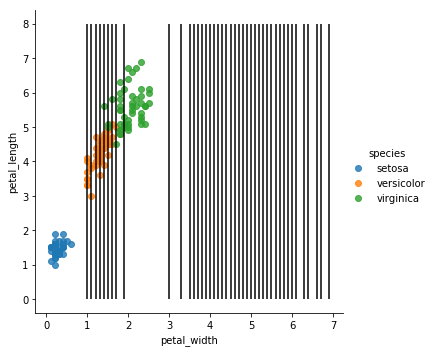

In [10]:
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.vlines(x=potential_splits[2],ymin=0,ymax=8)

# 3.Split the data into 2 using the partition value

In Previous step we identified values on which we can split our dataset for each attribute and stored the result in a dictionary. We will use the dictionary to identify the best split and then split the data into 2. left_dataset, right_dataset.

We will look at how to identify the best split later because it involves understanding of information gain and entropy. 

For now let's create a function which will take split value and split attribute as input and would return the left_dataset and right_dataset.

Function signature should look like below

In [11]:
def split_data(data,split_column,split_value):
    
    return left_dataset, right_dataset
    

How to split the dataset into 2 based on some value
1. First thing that we need to understand is that we need to split the whole dataset not single column.
2. Identify the type of column whether it is continous or categorical. For simplicity sake lets assume string values as categorical and others as continous. We can revisit this definition later. As we can identify this at start of program so that we dont have to calculate this every time
3. we can simply iterate through all values in the split column check below condition
    a. If variable is continous , check if value is <= to split value
    b. If variable is categorical, check if value is == to split value
4. Rows which will satisfy the condition will be stored in left dataset
5. Rows that don't satisfy the condition will get stored in right dataset
6. return the left dataset and right dataset

Again lets use iris flower dataset check the function. Lets  arbitarily assign 0.8 as split_value and  3 as split_column (same example we have been using, becuase this value should separate the sentosa species )

In [12]:
data = df.values
split_value = 0.8
split_column = 3

column_values = data[:,split_column]

if isinstance(column_values, str):
    left_dataset = data[column_values == split_value]
    right_dataset = data[column_values != split_value]
else:
    left_dataset = data[column_values <= split_value]
    right_dataset = data[column_values > split_value]

print(np.unique(left_dataset[:,-1]))

print(np.unique(right_dataset[:,-1]))

['setosa']
['versicolor' 'virginica']


Seems like our code is working fine. The result are as expected. We can see what is the output of the left dataset

In [13]:
left_dataset

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

Looks like our code is working properly. We can incorporate this into our function. This function will later become method within a class DecisionTree

In [50]:
def split_data(data,split_column,split_value):
    column_values = data[:,split_column]

    type_of_feature = FEATURE_TYPES[split_column]
 
    if type_of_feature == "continuous":
        left_dataset = data[column_values <= split_value]
        right_dataset = data[column_values > split_value]
    else:
        left_dataset = data[column_values == split_value]
        right_dataset = data[column_values != split_value]
    return left_dataset, right_dataset
    

lets visually see what has happened

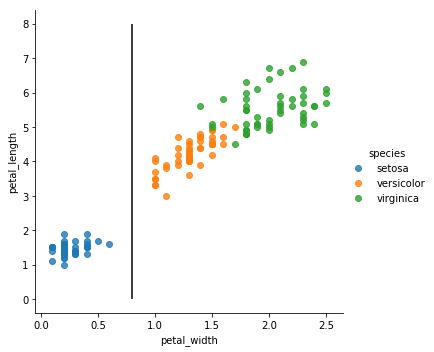

In [19]:
# Data before the split
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.vlines(x=0.8,ymin=0,ymax=8)

ld,rd = split_data(df.values,3,0.8)

(0, 2.5)

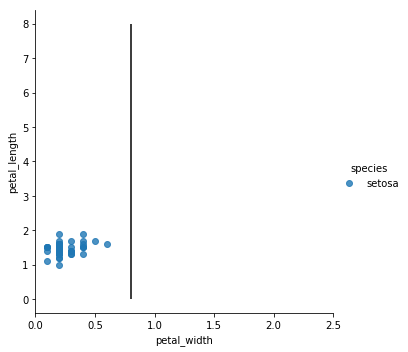

In [20]:
# plotting the left dataset. 
# NOTE : some preprocessing is done to convert the left dataset from numpy array to pandas and give it column names

column_names = df.columns
ld = pd.DataFrame(ld,columns=column_names)
sns.lmplot(data=ld,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.vlines(x=0.8,ymin=0,ymax=8)
plt.xlim(0,2.5)

(0, 2.5)

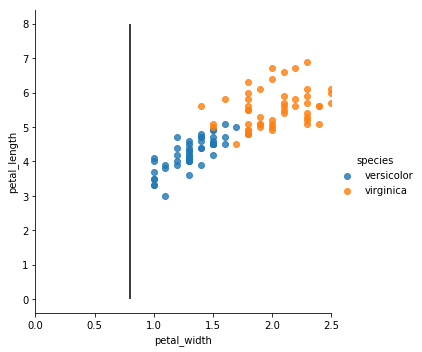

In [21]:
# plotting the right dataset. 
# NOTE : some preprocessing is done to convert the right dataset from numpy array to pandas and give it column names

rd = pd.DataFrame(rd,columns=column_names)
sns.lmplot(data=rd,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.vlines(x=0.8,ymin=0,ymax=8)
plt.xlim(0,2.5)

## 6.Function to calculate entropy

### By the way what is entropy ?

Well entropy is given by this formula

<h3>
\begin{equation*}
Entropy\; H(X) = -\sum p(X)\log p(X)
\end{equation*}
    </h3>
    
Lets understand in common terms. 
In physics, entropy stands for amount of randomness. Similar notion is used in data science as well. 

Lets take an example. 
I have 3 bowls with balls (bowl1, bowl2 and bowl3) . Bowl1 contains 3 red , 1 green.  Bowl2 contains 2 red ,2 green and Bowl3 contains 4 red.

What is the proabability of picking a red ball.

bowl1 = 3/4 = 0.75  

bowl2 = 2/4 = 0.5

bowl3 = 4/4 = 1

Similarly, What is the proabability of picking a green ball.

bowl1 = 1/4 = 0.25  

bowl2 = 2/4 = 0.5

bowl3 = 0/4 = 1

lets calculate the entropy of each bowl

E(bowl1) = -0.75 * log2(0.75) - 0.25* log2(0.25) = -0.75 * -0.415 - 0.25*-2 = 0.811

E(bowl2) = -0.5 * log2(0.5) - 0.5* log2(0.5) = -0.5 *-1 - 0.5*-1 = 1

E(bowl3) = -1 * log2(1) - 0*log2(0) = 0


E(bowl2) has highest entropy meaning highest randomness or uncertainity. You can pick a ball and there is equal probability of both red ball and green ball. 
E(bowl1) has high entropy but less than bowl2 because their is more chance of picking a red ball than green ball
E(bowl3) has zero entropy meaning you are always certain

Our dataset will have very high entropy initially but eventually at the leaf nodes the entropy will be zero(mostly) because leaf will have only one value hence no uncertainity.

We can use this property in our decision tree, for every split we can check that after split whether entropy is increasing or decreasing, We choose the split which provides highest entropy reduction. That is also called information gain. 

Lets write a function which does this. Our function should look like below. It should take the data return entropy for that data


In [23]:
def calculate_entropy(data):
    
    return entropy

To calculate entropy 
1. First identify the variable for which we want to calculate entropy of the dataset, this will always be the target variable as we want to reduce the uncertainity in the target variable
2. get all the unique values and their counts for the target variable
3. divide count of each unique value by the total count. this will give probability of each unique value
4. calculate the overall entropy

label = df.values[:,-1]

_,counts = np.unique(label,return_counts=True)

probabilities = counts/counts.sum()

entropy = sum(probabilities * -np.log2(probabilities))

print(entropy)

above code should perform this. 

Lets check the entropy for some cases. 



In [24]:
# entropy of entire dataset
label = df.values[:,-1]
_,counts = np.unique(label,return_counts=True)

probabilities = counts/counts.sum()
entropy = sum(probabilities * -np.log2(probabilities))
print('Entropy of entire dataset {}'.format(entropy))


# Entropy if we take only rows which have petal_width less than 0.8 . 
# This will return dataset with only sentosa and hence entropy should be 0
label = df[df.petal_width < 0.8].values[:,-1]
_,counts = np.unique(label,return_counts=True)

probabilities = counts/counts.sum()
entropy = sum(probabilities * -np.log2(probabilities))
print('Entropy of only Sentosa {}'.format(entropy))


# Entropy if we take only rows which have petal_width greater than 0.8 . 
# This will return dataset with  versicolor and virginica with each having  50 samples and hence entropy should be 1
label = df[df.petal_width > 0.8].values[:,-1]
_,counts = np.unique(label,return_counts=True)

probabilities = counts/counts.sum()
entropy = sum(probabilities * -np.log2(probabilities))
print('Entropy of only Versicolor and Virginica {}'.format(entropy))

Entropy of entire dataset 1.584962500721156
Entropy of only Sentosa 0.0
Entropy of only Versicolor and Virginica 1.0


Looks like our code is working properly. We can incorporate this into our function. This function will later become method within a class DecisionTree

In [25]:
def calculate_entropy(data):
    label = data[:,-1]
    _,counts = np.unique(label,return_counts=True)

    probabilities = counts/counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy

# 7.function to calculate entropy after split

We know how to calculate entropy and also have a know how to split dataset into two once we have the split value. 

Lets recap little bit on what we have built
1. all_potential_splits():- Identify all possible splits in the dataset and store the result in a dictionary, dictionary is indexed by column
2. split_data() :- Given a dataset, a column and a split value we are able to split the dataset into 2 smaller dataset based on the split_value
3. calculate_entropy() :- We are able to calculate the entropy of any particular dataset. And we understand as our predictability increases the entropy decreases. Meaning our split should be such that weighted entropy of childs is less than that of parent. 

We can use the above functions to choose the right split for our decision tree. 

But before we go there we need to calculate the entropy of child node. i.e. weighted entropy of left_dataset and right_dataset. The function will have the below signature. It will receive the two dataset and will return the weighted entropy of both.

In [26]:
def get_child_entropy(left_dataset,right_dataset):
    
    return child_entropy

To calculate child entropy.
1. Calcualte the total number of rows in both the datasets
2. Calculate the entropy of both left_dataset and right_dataset
3. Calculate the weighted entropy using this formula, 
len(left_dataset)/total_len * entropy(left_dataset) + len(right_dataset)/total_len * entropy(right_dataset)
4. return the value

Again lets use the Iris dataset as example

In [29]:
data = df.values
print('Entropy of Parent Dataset {}'.format(calculate_entropy(data)))

left_dataset,right_dataset = split_data(data,3,0.8)

total_len = len(left_dataset) + len(right_dataset)
left_dataset_entropy = calculate_entropy(left_dataset)
right_dataset_entropy = calculate_entropy(right_dataset)

child_entropy = len(left_dataset)/total_len * left_dataset_entropy + len(right_dataset)/total_len * right_dataset_entropy

print('Entropy of left_dataset = {}  entropy of right_dataset {}'.format(left_dataset_entropy, right_dataset_entropy))
print('Weighted entropy of child {}'.format(child_entropy))
      

Entropy of Parent Dataset 1.584962500721156
Entropy of left_dataset = 0.0  entropy of right_dataset 1.0
Weighted entropy of child 0.6666666666666666


The code seems to be working. One observation we can make is after splitting the predictive power has improved. 
This is the exact logic that we will use in next section but for now lets complete our function. 

In [30]:
def get_child_entropy(left_dataset,right_dataset):
    total_len = len(left_dataset) + len(right_dataset)
    left_dataset_entropy = calculate_entropy(left_dataset)
    right_dataset_entropy = calculate_entropy(right_dataset)

    child_entropy = len(left_dataset)/total_len * left_dataset_entropy + len(right_dataset)/total_len * right_dataset_entropy
    return child_entropy

In [31]:
# validating whether code is working well in the function
print(get_child_entropy(left_dataset,right_dataset))

0.6666666666666666


# 2.Function to identify the best feature and value to particition on using entropy and information gain

Now its time to identify the best split and return that split value and split column. 
The signature of our function would be

In [32]:
def best_split(data,potential_splits):
    
    
    return best_split_value , best_split_column

How to identify the best split. Given we have the dataset and list of all available splits

1. calculate the entropy of the data. Store the entropy as best entropy
2. loop through all the indexs in the potential_splits dictionary, i.e. loop through all the column
    A. loop through all values for each column
        i. split_data for each column,split_value pair in potential splits into left dataset and right dataset
        ii. calculate weighted entropy of child datasets (left_dataset and right_dataset)
        iii. if child entropy is less than best_entropy
                a. Store the split_value and split_column in best_split_value and best_split_column
                b. best entropy == child entropy
        iv. else continue
4. return best_split_value and best_split_column        

As always we will use Iris dataset to check our solution
       

In [33]:
data = df.values
potential_splits = all_potential_splits(data)

In [34]:
parent_entropy = calculate_entropy(data)
best_entropy = parent_entropy

for index in potential_splits:
    for value in potential_splits[index]:
        left_dataset,right_dataset = split_data(data,index,value)
        child_entropy = get_child_entropy(left_dataset,right_dataset)
#        print('Index = {}  value = {} child entropy = {} parent entropy = {}'.format(index,value,child_entropy,parent_entropy))
        if child_entropy < best_entropy:
            best_split_column = index
            best_split_value = value
            best_entropy = child_entropy
            information_gain = parent_entropy - best_entropy
print('split_column {} split_value {} entropy {} parent entropy {} information gain {}'.format(best_split_column,best_split_value,best_entropy,parent_entropy,information_gain))

split_column 2 split_value 1.9 entropy 0.6666666666666666 parent entropy 1.584962500721156 information gain 0.9182958340544894


Ok we have received some output in format that we expected. but is it the best split. 
Lets look at it visually 

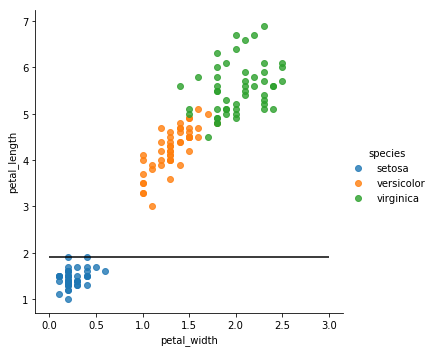

In [35]:
# Data before the split
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.hlines(y=best_split_value,xmin=0,xmax=3)

Few Questions
1. Although the line separates the points perfectly it is very close to one cluster, what effect it will have on accuracy ?
2. Is it really the best split, we have seen example of separating using petal_width and 0.8 value which seemed quite right. Why was that split not selected ?

Explanations
2. There are multiple datapoint which are able to achieve similar split. We got this split because it comes before any other variable and our condition "child_entropy < best_entropy" is not satisfied. So mathematically it is the best split or one of the best split on the data it has seen. 

1. But in practice it may not be the best split. because it is so close to the cluster that it may misclassify few data points on actual data. How can we overcome this problem ?
While designing the potential splits we have taken unique values as points for split, one way to reduce the error can be to take average of two points as as split value rather than acutal points. 

This is modification we will make later on once we have a working model. for now the code is working fine or we can continue


In [36]:
def best_split(data,potential_splits):
    parent_entropy = calculate_entropy(data)
    best_entropy = 999

    for index in potential_splits:
        for value in potential_splits[index]:
            left_dataset,right_dataset = split_data(data,index,value)
            child_entropy = get_child_entropy(left_dataset,right_dataset)
            if child_entropy < best_entropy:
                best_split_column = index
                best_split_value = value
                best_entropy = child_entropy
                information_gain = parent_entropy - best_entropy
    
    return best_split_column , best_split_value

# 4.Check each split if Data is Pure

In previous example after splitting the data we received two datasets. 
1. Left_dataset with all "sentosa" 
2. right_dataset with "versicolor" and "virginica"

Now we need to again split these two datasets so that tree can grow. But wait what is the point of splitting the left dataset ? every element in left_dataset belong to sentosa class. And yes that is the case. No point in classifying any further if all belong to only one class. 

We would need to put a logic in our program which will tell us stop going further because the node has only 1 class in it. That is purity.

So if any dataset is pure we will not classify it any further. 

Lets write a function for this. The signature of the function is below. It will receive dataset as input and will return a boolen value "True" or "False". 

In [37]:
def check_purity(data):
   
    return True
    return False

How to construct this function
1. select the target column or the label column from the dataset.
2. Check the unique values in the label column
3. Return True, If their is only one unique value it will mean that Data is Pure and all rows in the dataset belong to only one class
4. Else Return False

for validation perspective lets print Purity rather than returning it while incorporating in the function we will replace the print statements with return statments

Again lets use Iris dataset for validating the logic.

Using the original dataset
Data is not Pure


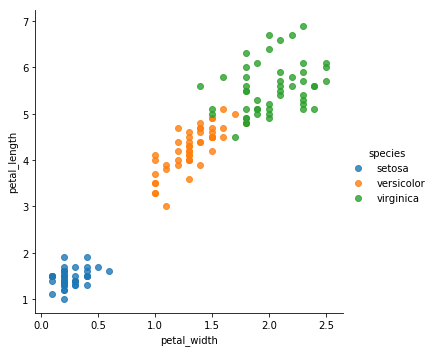

In [38]:
print('Using the original dataset')
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
data = df.values
column_names = df.columns
label = data[:,-1]
unique_classes,unique_class_count = np.unique(label,return_counts=True)
    
if len(unique_classes) == 1:
    print("Data is Pure")
else:
    print("Data is not Pure")

Using the left dataset after splitting on column 2 and split value 1.9
Data is Pure


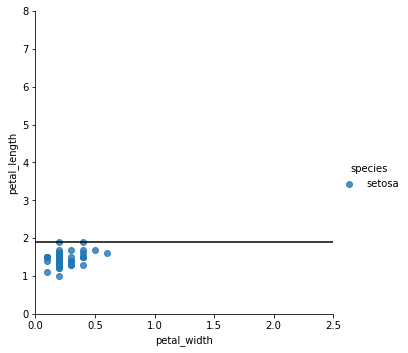

In [39]:
print('Using the left dataset after splitting on column 2 and split value 1.9')

data = df.values
left_dataset,right_dataset = split_data(data,2,1.9)

ld = pd.DataFrame(left_dataset,columns=column_names)
sns.lmplot(data=ld,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.hlines(y=1.9,xmin=0,xmax=3)
plt.xlim(0,2.5)
plt.ylim(0,8)

label = left_dataset[:,-1]
unique_classes,unique_class_count = np.unique(label,return_counts=True)
    
if len(unique_classes) == 1:
    print("Data is Pure")
else:
    print("Data is not Pure")

Using the right dataset after splitting on column 2 and split value 1.9
Data is not Pure


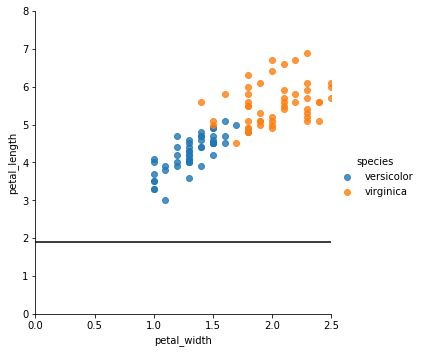

In [40]:
print('Using the right dataset after splitting on column 2 and split value 1.9')

data = df.values
left_dataset,right_dataset = split_data(data,2,1.9)

rd = pd.DataFrame(right_dataset,columns=column_names)
sns.lmplot(data=rd,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.hlines(y=1.9,xmin=0,xmax=3)
plt.xlim(0,2.5)
plt.ylim(0,8)
label = right_dataset[:,-1]
unique_classes,unique_class_count = np.unique(label,return_counts=True)
    
if len(unique_classes) == 1:
    print("Data is Pure")
else:
    print("Data is not Pure")

Logic is working well. lets encapsulate the logic into the function

In [41]:
def check_purity(data):
    label = data[:,-1]
    unique_classes,unique_class_count = np.unique(label,return_counts=True)

    if len(unique_classes) == 1:
        return True
    else:
        return False   

# 9.Function to return classification from leaf node

Once we encounter a pure dataset. rather than splitting it further we would like to return the classification. because it becomes a leaf.

The signature for the function is below

In [42]:
def classify(data):
    
    
    return classification

If we take case that classify function will be called only when data is pure then a simple statement like 

"return np.unique(data[:,-1])" will be enough

But that will not be the case always, mostly because of min_leaf concept. 
min_samples_leaf :- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches

This is to avoid overfitting. Otherwise the decision tree will overfit the training data and will give 100% accuracy but will strugle when it will try to classify new data.

So assuming min_samples_leaf = 3 the tree will not grow any further. I will take the most frequent element of the dataset (out of 3, in this case or if all classes have same instance count send the first one returned by np.unique function)

how to make this function
1. get the label column from the dataset
2. get unqiue classes and their count from label column
3. Choose the class with maximum count 
4. Return the class



In [43]:
label = data[:,-1]
unique_classes,unique_count = np.unique(label,return_counts=True)

class_index = unique_count.argmax()
classification = unique_classes[class_index]

print(classification)

setosa


In [44]:
label = right_dataset[:,-1]
unique_classes,unique_count = np.unique(label,return_counts=True)

class_index = unique_count.argmax()
classification = unique_classes[class_index]

print(classification)

versicolor


In [45]:
label = left_dataset[:,-1]
unique_classes,unique_count = np.unique(label,return_counts=True)

class_index = unique_count.argmax()
classification = unique_classes[class_index]

print(classification)

setosa


The function seems to be working correctly. since The dataset contain 50 instances of all 3 classes. the argmax() function returns the first class that it encounters.
Same is the case when we use the right_dataset

This is the behaviour we desire. 

Lets incorporate the functionality into the function

In [46]:
def classify(data):
    label = data[:,-1]
    unique_classes,unique_count = np.unique(label,return_counts=True)

    class_index = unique_count.argmax()
    classification = unique_classes[class_index]
    
    return classification

In [47]:
print(classify(df.values))

setosa


# Determining type of variable. Whether Continous or categorical

The iris example provides one important convinience, We don't have to perform any processing and all the features are numeric in nature. 

But in real world cases we rarely get to deal with such cases. usually the dataset is contain categorical and continous and more :) . 

We would need to include a check to identify whether a variable is continuous or categorical. Not dealing with other cases. 

Also Dataset will contain lot of noise. I am not including any additional functionality of deal with missing data or noise.

The logic to determining the type of variable is simple. 
categorical
1. Check if the values are string.
2. Or if values are numeric whether the count is less than 10

Everything else continuous

In [48]:
def determine_type_of_feature(df,n_unique_values_treshold = 10):
    
    feature_types = []
    
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

All the required functions to create a decision tree are ready. 

Only thing left is to write the fit and predict functions and then encapsulate all functions as methods of a DecisionTree Class

# Creating a decision Tree

Most of the ground work is done in previous sections. We have functions for
1. Identifying potential splits
2. Splitting data into 2 datasets
3. calculating the entropy
4. calculating child entropy
5. Identifying the best split from list of potential splits using entropy
6. checking purity of data
7. classifying the leaf node

We have all the tools to build a tree but there are few gaps.
1. How to create tree for whole dataset.
2. How to store the tree

Explanations
1. Create tree for whole dataset
We will traverse through the dataset.
IF dataset is pure
    return the classification of that dataset
ELSE 
    Identify the best split for that dataset
    Store the split value and split column
    Split dataset into left_dataset and right_dataset
    
    perform the same operation on left and right_dataset (Recursion)
2. we will be storing the results in a dictionary, similar to below. Each element will be recurively added 
{'A' <= {'B' <= {C <= ........}}}

Let's start with the process of creating the fit function. Below will be the signature of the fit function. It will take train_data and train_label as input and would return a tree

In [49]:
def fit(train_data,train_label):

    return tree

Problem 1 :- In our code we have assumed that label column will be the last column of the dataset but in the fit function we are accepting two separate dataset for train data and training label

To overcome this challenge, either we can make changes to all the functions or 
just concatenate the two numpy arrays.

Problem 2 :- We need to perform recursion of create a decision tree. Problem is everytime we will call fit function as part of recursive call we will need to separate the columns we merged and then pass the data and label separately.  This will make the code unnecessarily messy.

We can keep the fit function simple and call another function within fit which will have the recursion logic. 

We can simply use data = np.column_stack((data,y))to merge the two datasets 

In [51]:
data = df.drop('species',axis=1).values
y = df['species']
print(data.shape,y.shape)

data = np.column_stack((data,y))

print(data.shape)


(150, 4) (150,)
(150, 5)


In [52]:
def fit(train_data,train_label):
    train_data["label"] = train_label
    tree = create_decision_tree(train_data)
    return tree

# Create Decision Tree

The signature for create_decision_tree will be following. It will take the data, create and return the tree

In [53]:
def create_decision_tree(data):
    
    return tree

This function will
1. Create tree for whole dataset
2. We will traverse through the dataset.
3. IF dataset is pure
    a. return the classification of that dataset
4. ELSE 
    a. Identify the best split for that dataset
    b. Store the split value and split column
    c. Split dataset into left_dataset and right_dataset
    
5. perform the same operation on left and right_dataset (Recursion)



 lets see one example of recursion before we processing. 
 lets create a dictionary similar to one we will be creating(nested dictionary) and use some random data.

for this example I will read a simple array of numbers and will store each number in a nested dictionary.

We will be doing do by calling our split function again untill there are no elements in data. 

In [54]:
data = [1,2,3,4,5]
def split(data):
    if data:
        left_value, *right_value = data  # This is a nicer way of doing head, tail = data[0], data[1:]
        return {left_value: split(right_value)}
    else:
        return 
split(data)

{1: {2: {3: {4: {5: None}}}}}

Our tree will also be dictionary with conditions as nodes and classification as leaf

In [55]:
def create_decision_tree(df,min_samples=3,counter=0,max_depth=5):
    
        # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    if check_purity(data) or (len(data) < min_samples) or (counter == max_depth):
        classification =  classify(data)
        return classification
    
    
    else:
        counter += 1
        
        potential_splits = all_potential_splits(data)
 #      print(potential_splits)
        split_column,split_value = best_split(data,potential_splits)
        
        left_dataset, right_dataset = split_data(data,split_column,split_value)
        
       
        if len(left_dataset) == 0 or len(right_dataset) == 0:
            classification = classify(data)
            return classification
        
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        tree = {question: []}
        
        yes_answer = create_decision_tree(left_dataset,min_samples,counter,max_depth)
 
        no_answer = create_decision_tree(right_dataset,min_samples,counter,max_depth)
        
        if yes_answer == no_answer:
            tree = yes_answer
        else:
            tree[question].append(yes_answer)
            tree[question].append(no_answer)
        return tree

In [56]:
df = pd.read_csv("Iris.csv")
data = df.drop('species',axis=1)
y = df['species']
print(data.shape,y.shape)
tree = fit(data,y)

(150, 4) (150,)


In [57]:
pprint(tree)

{'petal_length <= 1.9': ['setosa',
                         {'petal_width <= 1.7': [{'petal_length <= 4.9': [{'petal_width <= 1.6': ['versicolor',
                                                                                                  'virginica']},
                                                                          {'petal_width <= 1.5': ['virginica',
                                                                                                  {'sepal_length <= 6.7': ['versicolor',
                                                                                                                           'virginica']}]}]},
                                                 {'petal_length <= 4.8': [{'sepal_length <= 5.9': ['versicolor',
                                                                                                   'virginica']},
                                                                          'virginica']}]}]}


In [58]:
df = pd.read_csv('titanic.csv')
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({"Age": median_age, "Embarked": mode_embarked})

y = df['Survived']
data = df.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)
tree = fit(data,y)


In [59]:
pprint(tree)

{'Sex = female': [{'Pclass = 3': [{'Fare <= 23.25': [{'Age <= 36.0': [1,
                                                                      {'Age <= 47.0': [0,
                                                                                       1]}]},
                                                     {'Parch = 0': [1, 0]}]},
                                  {'Fare <= 28.7125': [{'Fare <= 27.75': [1,
                                                                          0]},
                                                       {'Age <= 2.0': [0,
                                                                       1]}]}]},
                  {'Fare <= 26.25': [{'Age <= 12.0': [{'SibSp = 1': [1,
                                                                     {'Fare <= 12.475': [1,
                                                                                         0]}]},
                                                      {'Embarked = C': [{'Fare <= 15.05': [0,
 

# Predict the values

The last task in creating a decision tree would be ability to perform predictions on unseen data. 

Since we have created a tree, it should not be too difficult to perform. Lets see how can we do this.

1. We have a Tree as a dictionary. 
2. every node in tree contains one decision and 2 leafs.
3. Leaf can either be the classification or another subtree. 
4. If the node is leaf we are done
5. If node is leaf, then it will again have two elements (either node or leaf)

We will define a predict function which will take the input and the tree that we just created and would return the classification.




In [60]:
def predict(test,tree):
    
    return classification

If we remember each node of our tree is in format.

<b>"variable operator value "</b>

here we conpare the variable with the value using the operator . <b> Fare <= 23.25 </b>, In this case we will conpare the Fare variable with 23.25 value using operator <= , if the answer is true then we will move to the left leaf otherwise will move to the right leaf in the tree. 

If node is not a dictionary (meaning we have reached leaf) then we will just return the value in that node. Other wise we will again call the predict function using the same test data and the remaining tree. 

In [61]:
# Lets see an example 

question = list(tree.keys())[0]
print('Tree is {}'.format(tree))
print(" ")
print('The question in top node is {}'.format(question))

variable, operator , value = question.split(" ")
print(" ")
print("variable  {}".format(variable))
print(" ")
print('Operator {}'.format(operator))
print(" ")
print("value {}".format(value))





Tree is {'Sex = female': [{'Pclass = 3': [{'Fare <= 23.25': [{'Age <= 36.0': [1, {'Age <= 47.0': [0, 1]}]}, {'Parch = 0': [1, 0]}]}, {'Fare <= 28.7125': [{'Fare <= 27.75': [1, 0]}, {'Age <= 2.0': [0, 1]}]}]}, {'Fare <= 26.25': [{'Age <= 12.0': [{'SibSp = 1': [1, {'Fare <= 12.475': [1, 0]}]}, {'Embarked = C': [{'Fare <= 15.05': [0, 1]}, 0]}]}, {'Fare <= 26.3875': [1, {'Pclass = 1': [{'Age <= 17.0': [1, 0]}, {'SibSp = 0': [1, 0]}]}]}]}]}
 
The question in top node is Sex = female
 
variable  Sex
 
Operator =
 
value female


 Now based on the comparision of variable and value. We decide to choose either left tree or right tree.

In [62]:
 

# Choosing Left tree
left_tree = tree[question][0]

# Choosing Right tree
right_tree = tree[question][1]

print("left Tree")
pprint(left_tree)
print("right tree")
pprint(right_tree)


left Tree
{'Pclass = 3': [{'Fare <= 23.25': [{'Age <= 36.0': [1,
                                                    {'Age <= 47.0': [0, 1]}]},
                                   {'Parch = 0': [1, 0]}]},
                {'Fare <= 28.7125': [{'Fare <= 27.75': [1, 0]},
                                     {'Age <= 2.0': [0, 1]}]}]}
right tree
{'Fare <= 26.25': [{'Age <= 12.0': [{'SibSp = 1': [1,
                                                   {'Fare <= 12.475': [1, 0]}]},
                                    {'Embarked = C': [{'Fare <= 15.05': [0, 1]},
                                                      0]}]},
                   {'Fare <= 26.3875': [1,
                                        {'Pclass = 1': [{'Age <= 17.0': [1, 0]},
                                                        {'SibSp = 0': [1,
                                                                       0]}]}]}]}


Now we can check whether the selected node is a dictionary (If it is a dictionary meaning the answer is a subtree). If tree is dictionary we can again call the predict function using the test example and remaining tree. 

If the selected node is not a dictionary then Bingo it is our answer we just return that value and we are done.

if not isinstance(answer, dict):
    
    return answer


else:

    residual_tree = answer

    return classify_example(test, residual_tree)
    

Putting it all together 

In [63]:
def classify_example(test, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if test[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(test[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(test, residual_tree)

But the above will classify only one instance. We want ability to either classify on example or mulitple examples. To perform that we will need to write the predict function which inturn will call the classify_example function.

In [64]:
def predict(test,tree):
    output = []
    index = test.index.tolist()
    for i in index:
        output.append(classify_example(test.loc[i],tree))
    return output
    

In [65]:
df = pd.read_csv("Iris.csv")
data = df.drop('species',axis=1)
y = df['species']
print(data.shape,y.shape)
tree = fit(data,y)

output = predict(data,tree)

(150, 4) (150,)


In [66]:
output

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [67]:
accuracy = (y==output)
accuracy = accuracy.mean()
print('Accuracy of prediction is  {} '.format(accuracy))

Accuracy of prediction is  1.0 


Accuracy is 1 beacuse the training and testing data are same. Which is a bad idea. Lets just separate the training and testing samples and check the accuracy again

In [69]:
import random

df = pd.read_csv("Iris.csv")
test_size = 50
indices = df.index.tolist()
test_indices = random.sample(population=indices, k=test_size)

test_df = df.loc[test_indices]
train_df = df.drop(test_indices)

X_train = train_df.drop('species',axis=1)
y_train = train_df['species']

X_test = test_df.drop('species',axis=1)
y_test = test_df['species']


# Building the Tree
tree = fit(X_train,y_train)

# Predicting on the test data
test_output = predict(X_test,tree)

# Checking the accuracy 
Accuracy = (y_test == test_output)
Accuracy = Accuracy.mean()
print('Accuracy of prediction is  {} '.format(Accuracy))


Accuracy of prediction is  0.92 
